In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from cm import plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#import graphviz
from IPython.display import SVG

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [19]:
#Create a DataFrame, ha_costs_df, from the mmd_heart_attack_data.csv file.
ha_costs_df = pd.read_csv('../data/mmd_heart_attack_data.csv')
#Look at the head and tail of the DataFrame
ha_costs_df.head(-1)
ha_costs_df['state'].value_counts()
ha_costs_df.rename(columns = {'analysis_value': 'ha_avg_cost'}, inplace = True)
ha_costs_df.head(5)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,ha_avg_cost
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,40470
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,36615
2,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,undefined,46509
3,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,undefined,42949
4,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,undefined,50067


In [22]:
ha_costs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 2656 non-null   int64 
 1   geography            2656 non-null   object
 2   measure              2656 non-null   object
 3   adjustment           2656 non-null   object
 4   analysis             2656 non-null   object
 5   domain               2656 non-null   object
 6   condition            2656 non-null   object
 7   primary_sex          2656 non-null   object
 8   primary_age          2656 non-null   object
 9   primary_dual         2656 non-null   object
 10  fips                 2656 non-null   int64 
 11  county               2656 non-null   object
 12  state                2656 non-null   object
 13  urban                2656 non-null   object
 14  primary_race         2656 non-null   object
 15  primary_denominator  2656 non-null   object
 16  ha_avg

In [29]:
TN_ha_costs = ha_costs_df.loc[ha_costs_df['state'] == 'TENNESSEE']
TN_ha_costs.shape

(91, 17)

In [12]:
#Create a DataFrame, cancer_costs_df, from the mmd_cancer_data.csv file.
cancer_costs_df = pd.read_csv('../data/mmd_cancer_data.csv')
#Look at the head and tail of the DataFrame
cancer_costs_df.head(-1)
cancer_costs_df['state'].value_counts()
cancer_costs_df.rename(columns = {'analysis_value': 'cancer_avg_cost'}, inplace = True)
cancer_costs_df.head(5)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,cancer_avg_cost
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,19293
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,17151
2,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,undefined,19469
3,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,undefined,17234
4,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,undefined,20317


In [38]:
TN_cancer_costs = cancer_costs_df.loc[cancer_costs_df['state'] == 'TENNESSEE']
TN_cancer_costs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 2396 to 2490
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 95 non-null     int64 
 1   geography            95 non-null     object
 2   measure              95 non-null     object
 3   adjustment           95 non-null     object
 4   analysis             95 non-null     object
 5   domain               95 non-null     object
 6   condition            95 non-null     object
 7   primary_sex          95 non-null     object
 8   primary_age          95 non-null     object
 9   primary_dual         95 non-null     object
 10  fips                 95 non-null     int64 
 11  county               95 non-null     object
 12  state                95 non-null     object
 13  urban                95 non-null     object
 14  primary_race         95 non-null     object
 15  primary_denominator  95 non-null     object
 16  cance

In [13]:
geographic_info = pd.read_csv('../data/geographic_profile_update.csv')
geographic_info

,state,county,Median Household Income (5y Average),Median Household Income for +7-person Households (5y Avg.),Median Household Income for 1-person Households (5y Avg.),Median Household Income for 2-person Households (5y Avg.),Median Household Income for 3-person Households (5y Avg.),Median Household Income for 4-person Households (5y Avg.),Median Household Income for 5-person Households (5y Avg.),Median Household Income for 6-person Households (5y Avg.),...,Percent of 3 Person Households with 3 Workers (5y Avg.),Percent of 3 Person Households with No Workers (5y Avg.),Percent of Senior Population Below Federal Poverty Level (1y Avg.),Percent of Senior Population Below Federal Poverty Level (5y Avg.),Percentage of Total Housing Units that are Vacant (1y Avg.),Percentage of Total Housing Units that are Vacant (5y Avg.),Senior Unemployment Rate (1y Avg.),Senior Unemployment Rate (5y Avg.),Unemployment Rate (1y Avg.),Unemployment Rate (5y Avg.)
0,AL,Autauga County,53099.0,104659.0,26834.0,58452.0,76406.0,74429.0,73017.0,81500.0,...,0.101183,0.106110,NaN,0.061893,NaN,0.083869,NaN,0.079755,NaN,0.055252
1,AL,Baldwin County,51365.0,86250.0,26010.0,59570.0,68369.0,79153.0,69484.0,67693.0,...,0.124101,0.129932,0.077699,0.069984,0.293833,0.274180,0.032243,0.037965,0.035886,0.062713
2,AL,Barbour County,33956.0,NaN,16450.0,42631.0,42429.0,44563.0,46563.0,48250.0,...,0.093651,0.226190,NaN,0.162366,NaN,0.221912,NaN,0.083538,NaN,0.128247
3,AL,Bibb County,39776.0,111477.0,19127.0,41183.0,43520.0,51760.0,68375.0,76579.0,...,0.110305,0.206096,NaN,0.106445,NaN,0.214445,NaN,0.036667,NaN,0.071429
4,AL,Blount County,46212.0,50723.0,22171.0,50601.0,60406.0,64705.0,54390.0,48913.0,...,0.043669,0.186762,NaN,0.098941,NaN,0.132788,NaN,0.049601,NaN,0.059515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,WY,Sweetwater County,68233.0,94211.0,36884.0,77074.0,74030.0,89070.0,90544.0,103275.0,...,0.136929,0.053565,NaN,0.089024,NaN,0.125851,NaN,0.031863,NaN,0.050685
3216,WY,Teton County,75594.0,NaN,40613.0,86401.0,104185.0,106379.0,102321.0,78681.0,...,0.285209,0.000000,NaN,0.046450,NaN,0.344267,NaN,0.027027,NaN,0.021234
3217,WY,Uinta County,53323.0,78750.0,26641.0,59345.0,56186.0,79000.0,55822.0,125663.0,...,0.054170,0.075666,NaN,0.097962,NaN,0.150205,NaN,0.101167,NaN,0.063908
3218,WY,Washakie County,46212.0,63250.0,25625.0,61114.0,66894.0,61667.0,42500.0,NaN,...,0.153680,0.064935,NaN,0.044981,NaN,0.081868,NaN,0.041262,NaN,0.074419


In [14]:
geographic_info = geographic_info[['state', 'county', 'Median Household Income (5y Average)', 'Percent Below Federal Poverty Level (5y Avg.)', 'Percent of Senior Population Below Federal Poverty Level (5y Avg.)', 'Unemployment Rate (5y Avg.)', 'Senior Unemployment Rate (5y Avg.)']]
geographic_info.head(2)

,state,county,Median Household Income (5y Average),Percent Below Federal Poverty Level (5y Avg.),Percent of Senior Population Below Federal Poverty Level (5y Avg.),Unemployment Rate (5y Avg.),Senior Unemployment Rate (5y Avg.)
0,AL,Autauga County,53099.0,0.122660,0.061893,0.055252,0.079755
1,AL,Baldwin County,51365.0,0.129938,0.069984,0.062713,0.037965


In [31]:
TN_geo = geographic_info.loc[geographic_info['state'] == 'TN']
TN_geo.shape

(95, 7)

In [32]:
income_df = pd.read_csv('../data/irs_county_2016.csv')
income_df.loc[income_df['STATE'] == 'TN']

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
19752,47,TN,0,Tennessee,1,39580,22400,14440,980,25390,...,6760,17669,200,287,0,0,3970,7167,16170,59567
19753,47,TN,0,Tennessee,2,439770,345410,39920,49300,188490,...,109250,62045,0,0,0,0,37380,18477,366150,366510
19754,47,TN,0,Tennessee,3,717430,398720,115040,189290,341750,...,449870,461060,0,0,0,0,63270,70761,635450,1870568
19755,47,TN,0,Tennessee,4,759340,355970,217710,159890,347430,...,629080,1669328,110,100,0,0,104290,176690,646420,1783890
19756,47,TN,0,Tennessee,5,396810,128390,215890,42240,198820,...,382580,2135577,30,29,0,0,87440,220372,302390,849648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20515,47,TN,189,Wilson County,4,14400,7130,4050,2610,6520,...,12340,34654,0,0,0,0,2090,4150,12140,31712
20516,47,TN,189,Wilson County,5,9330,2890,5160,960,4600,...,9010,50591,0,0,0,0,2080,5356,7100,19970
20517,47,TN,189,Wilson County,6,7160,1060,5630,380,3560,...,7110,61964,0,0,0,0,1710,5743,5290,17041
20518,47,TN,189,Wilson County,7,10350,780,9260,240,5330,...,10330,190229,60,13,0,0,3810,19921,6270,24591


In [34]:
TN_income = income_df.loc[income_df['STATE'] == 'TN']
TN_income_edit = TN_income.loc[ : , ['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']]
TN_income_edit.columns = ['state', 'county', 'income_bucket', 'return_count', 'single_returns', 'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents', 'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment', 'unemployment_comp']
TN_income_edit.head(10)

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19752,TN,Tennessee,1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,2,439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132
19754,TN,Tennessee,3,717430,398720,115040,189290,1269420,472350,141070,12289681,717430,12486175,19660,58771
19755,TN,Tennessee,4,759340,355970,217710,159890,1486710,512170,154020,27370414,759340,27694026,19120,57012
19756,TN,Tennessee,5,396810,128390,215890,42240,881020,268500,106740,24350682,396810,24651803,10630,33894
19757,TN,Tennessee,6,241730,43690,182110,12690,606940,183160,71640,20916820,241730,21167809,6350,21411
19758,TN,Tennessee,7,298270,33380,254300,8230,807590,255170,91150,39800165,298270,40397276,5490,20281
19759,TN,Tennessee,8,97920,8640,85910,1760,281650,97810,31990,50066256,97920,51122320,560,2401
19760,TN,Anderson County,1,390,220,140,0,570,60,210,-7663,240,-7465,0,0
19761,TN,Anderson County,2,5170,4010,500,610,5330,1260,950,27496,5170,28135,60,156


In [35]:
TN_income_edit.shape

(768, 15)

In [44]:
income_county_agg = TN_income_edit.groupby(by=['county']).sum().reset_index()
income_county_agg.head()

,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
0,Anderson County,36,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452
1,Bedford County,36,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023
2,Benton County,36,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119
3,Bledsoe County,36,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458
4,Blount County,36,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551


In [45]:
TN_income_total = TN_income_edit.loc[TN_income_edit['county'] == 'Tennessee']
TN_income_total.head()

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19752,TN,Tennessee,1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,2,439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132
19754,TN,Tennessee,3,717430,398720,115040,189290,1269420,472350,141070,12289681,717430,12486175,19660,58771
19755,TN,Tennessee,4,759340,355970,217710,159890,1486710,512170,154020,27370414,759340,27694026,19120,57012
19756,TN,Tennessee,5,396810,128390,215890,42240,881020,268500,106740,24350682,396810,24651803,10630,33894


In [46]:
income_county_agg['mean_income'] = 1000*(income_county_agg['total_inc_amt'] / income_county_agg['return_count'])
income_county_agg.head()

,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,mean_income
0,Anderson County,36,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452,53382.385535
1,Bedford County,36,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023,47127.581262
2,Benton County,36,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119,41296.671710
3,Bledsoe County,36,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458,39743.640351
4,Blount County,36,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551,56786.162888


In [48]:
income_county_agg_county_only = income_county_agg.loc[income_county_agg['county'] != 'Tennessee']
income_county_agg_county_only.loc[income_county_agg_county_only['return_count'].idxmax()]

county                       Shelby County
income_bucket                           36
return_count                        431650
single_returns                      205500
joint_returns                       104290
head_of_house_returns               112920
exemptions                          836590
dependents                          325450
elderly                              86860
agi                               25467506
returns_with_total_inc              430150
total_inc_amt                     25843890
returns_with_unemployment             8020
unemployment_comp                    26306
mean_income                        59872.3
Name: 78, dtype: object

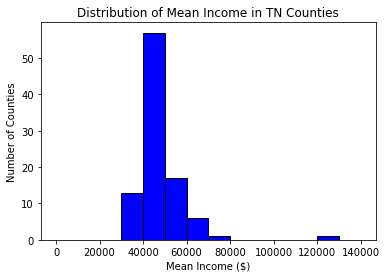

In [62]:
plt.hist('mean_income', data=income_county_agg_county_only, color='blue', edgecolor='black', bins = 14, range = (0, 140000))
plt.xlabel('Mean Income ($)')
plt.ylabel('Number of Counties')
plt.title('Distribution of Mean Income in TN Counties');

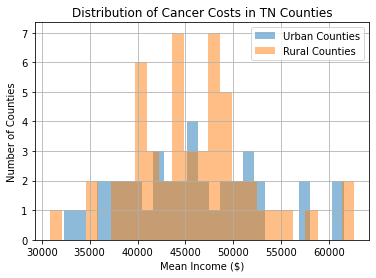

In [65]:
h = TN_ha_costs.ha_avg_cost[TN_ha_costs.urban == 'Urban'].hist(alpha=0.5,bins=25,label='Urban Counties')
h = TN_ha_costs.ha_avg_cost[TN_ha_costs.urban == 'Rural'].hist(alpha=0.5,bins=25,label='Rural Counties')
h.legend()
h.set_ylabel('Number of Counties')
h.set_xlabel('Mean Income ($)')
h.set_title('Distribution of Cancer Costs in TN Counties');

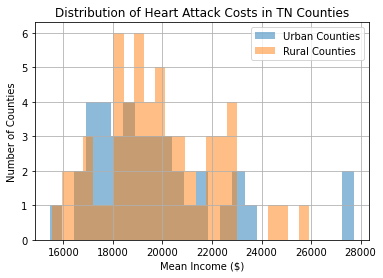

In [66]:
h = TN_cancer_costs.cancer_avg_cost[TN_cancer_costs.urban == 'Urban'].hist(alpha=0.5,bins=25,label='Urban Counties')
h = TN_cancer_costs.cancer_avg_cost[TN_cancer_costs.urban == 'Rural'].hist(alpha=0.5,bins=25,label='Rural Counties')
h.legend()
h.set_ylabel('Number of Counties')
h.set_xlabel('Mean Income ($)')
h.set_title('Distribution of Heart Attack Costs in TN Counties');

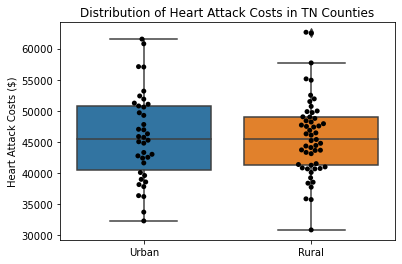

In [58]:
ha_costs_df_rural = TN_ha_costs.loc[ha_costs_df['urban'] == 'Rural']
ha_costs_df_rural.ha_avg_cost.describe()
ha_costs_df_urban = TN_ha_costs.loc[ha_costs_df['urban'] == 'Urban']
ha_costs_df_urban.ha_avg_cost.describe()
ha_data_boxplot = [ha_costs_df_urban['ha_avg_cost'], ha_costs_df_rural['ha_avg_cost']]
sns.boxplot(data=ha_data_boxplot)
sns.swarmplot(x='urban', y='ha_avg_cost', data=TN_ha_costs, color='black')
plt.xlabel('')
plt.ylabel('Heart Attack Costs ($)')
plt.title("Distribution of Heart Attack Costs in TN Counties");

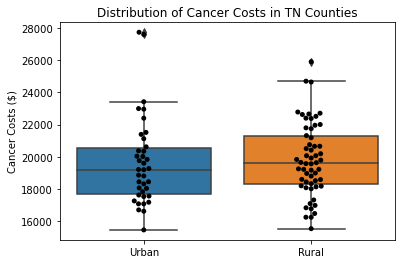

In [64]:
cancer_costs_df_rural = TN_cancer_costs.loc[cancer_costs_df['urban'] == 'Rural']
cancer_costs_df_rural.cancer_avg_cost.describe()
cancer_costs_df_urban = TN_cancer_costs.loc[cancer_costs_df['urban'] == 'Urban']
cancer_costs_df_urban.cancer_avg_cost.describe()
cancer_data_boxplot = [cancer_costs_df_urban['cancer_avg_cost'], cancer_costs_df_rural['cancer_avg_cost']]
sns.boxplot(data=cancer_data_boxplot)
sns.swarmplot(x='urban', y='cancer_avg_cost', data=TN_cancer_costs, color='black')
plt.xlabel('')
plt.ylabel('Cancer Costs ($)')
plt.title("Distribution of Cancer Costs in TN Counties");

In [ ]:
pd.crosstab(TN_ha_costs)